# Project on text extraction from images :

À l'ère de la numérisation, il est beaucoup plus facile de stocker, d'éditer, d'indexer et de trouver des informations dans un document numérique que de passer des heures à parcourir des documents imprimés, manuscrits ou dactylographiés. C'est pourquoi l'extraction de texte à partir d'images a trouvé de nombreuses applications.

L'extraction de texte, également connue sous le nom d'extraction de mots-clés, se base sur l'apprentissage automatique pour balayer le texte et extraire des mots et des phrases pertinents ou de base à partir de données non structurées telles que des articles d'actualité, des images, des sondages, etc ...

Dans ce projet, nous allons extraire du texte à partir d'images, puis appliquer quelques fonctions dessus pour améliorer les résultats. Ce projet pourra servir à différentes organisations d'extraire du texte d'images pour le stocker et ainsi gagner du temps plutôt que de devoir le taper manuellement.

## Importation des librairie et d'une image :

In [1]:
# Pour gérer les requêtes http :
import requests

# Librairie pour importer/visualiser les images : 
from PIL import Image

# librairie pour extraire du texte :
import pytesseract

# Librairie pour le traitement d'images
import cv2

# Pour les calculs nous utiliserons numpy
import numpy as np

from pytesseract import Output
import re
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

Maintenant que nous avons importé les librairies que nous allons utiliser, nous pouvons télécharger une image (avec du texte !) et la redimensionner pour plus de lisibilité :

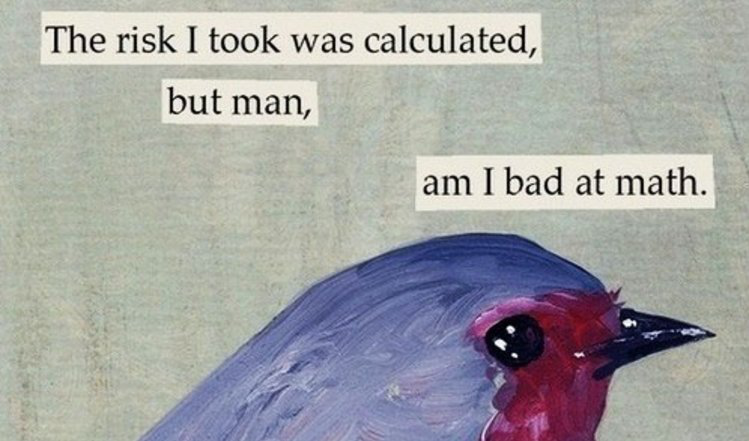

In [2]:
# importation d'une image depuis une url :

image = Image.open(requests.get("https://i.kym-cdn.com/entries/icons/facebook/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg", stream = True).raw)
image

Nous pouvons désormais extraire le texte sur l'image :

In [3]:
text = pytesseract.image_to_string(image)
print(text)

The risk I took was calculated,

but man,

am I bad at math.




Le programme ci-dessus montrera les résultats de l'image et nous avons utilisé tesseract sans prétraitement donc la précision sera très faible. Afin d'améliorer l'efficacicé du programme, nous pouvons réaliser différentes étapes de pré-traitement qui viendront rendre plus précis le résultat final.


## Prétraitement et détection

Afin  d'éviter que la précision de l'extraction chute, nous devons nous assurer que l'image est prétraitée de manière appropriée. Cela inclut la remise à l'échelle, la binarisation, la suppression du bruit, etc.

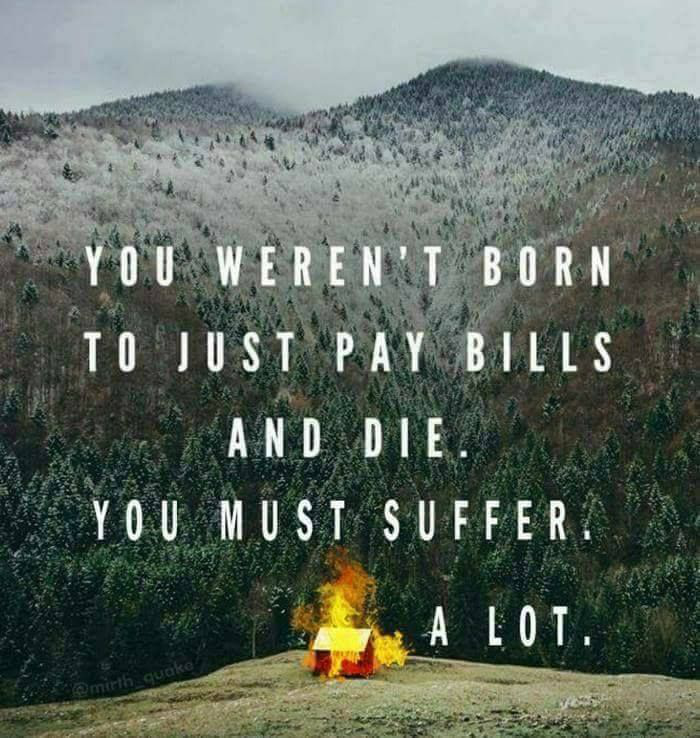

In [45]:
image = Image.open(requests.get("https://i.pinimg.com/originals/6c/71/b0/6c71b0424edb0274100f8a64b4ca981f.jpg", stream = True).raw)
image.save('sample.png')
image

In [46]:
text = pytesseract.image_to_string(image)
print(text)

Essayons de remplacer les caractères spéciaux par du vide :

In [47]:
try:
    # on utilise de nouveau la fonctionpytesseract.image_to_string pour extraire le texte (et on précise la langue)
    text = pytesseract.image_to_string(image, lang="eng")
    # maintenant les carctères à supprimer (caractères spéciaux par exemple, ici essayons juste avec "!")
    characters_to_remove = "!"
    new_string = text
    for character in characters_to_remove:
        # Le nouveau caractère remplacera le caractère spécial par du vide :
        new_string = new_string.replace(character,"")
    print(new_string)
    
    # pour gérer les erreurs si la boucle ne fonctionne pas :
except Ioerror as e: 
        print("Error (%s)." % e)

Utilisons maintenant la librairie openCV pour traiter des images complexes :

In [48]:
# téléchargeons l'image au format openCV
image = cv2.imread('sample.png')

### Conversion en échelle de gris (grayscaling)

Convertissons ensuite l'image en échelle de gris. L'image sera ainsi plus simple à traiter car ne contiendra plus que deux valeurs (0 & 1) :

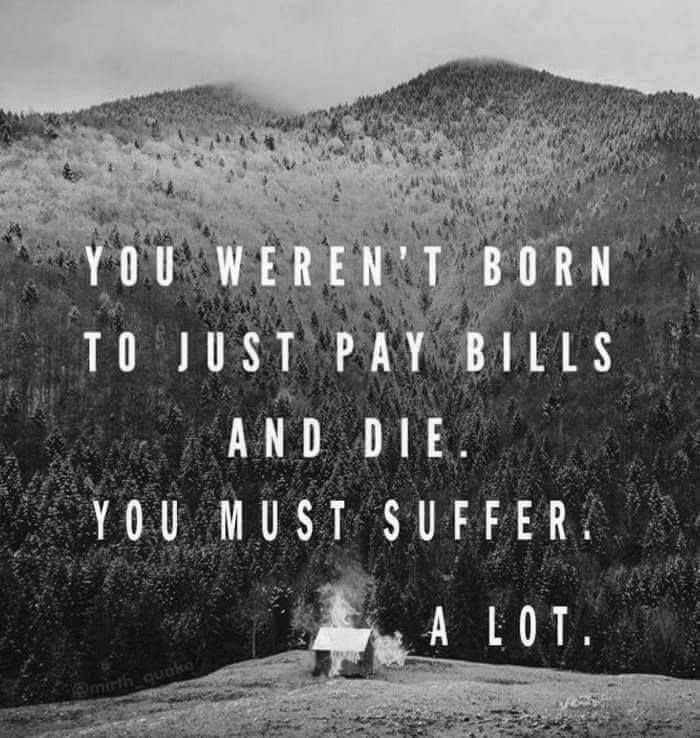

In [49]:
# Pour l'échelle de gris :
def get_greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = get_greyscale(image)
Image.fromarray(gray)

In [50]:
text = pytesseract.image_to_string(gray)
print(text)

### Suppression du bruit numérique

Enlevons maintenant le "bruit numérique" de l'image (on appelle bruit numérique toute fluctuation parasite ou dégradation que subit l'image de l'instant de son acquisition jusqu'à son enregistrement) :

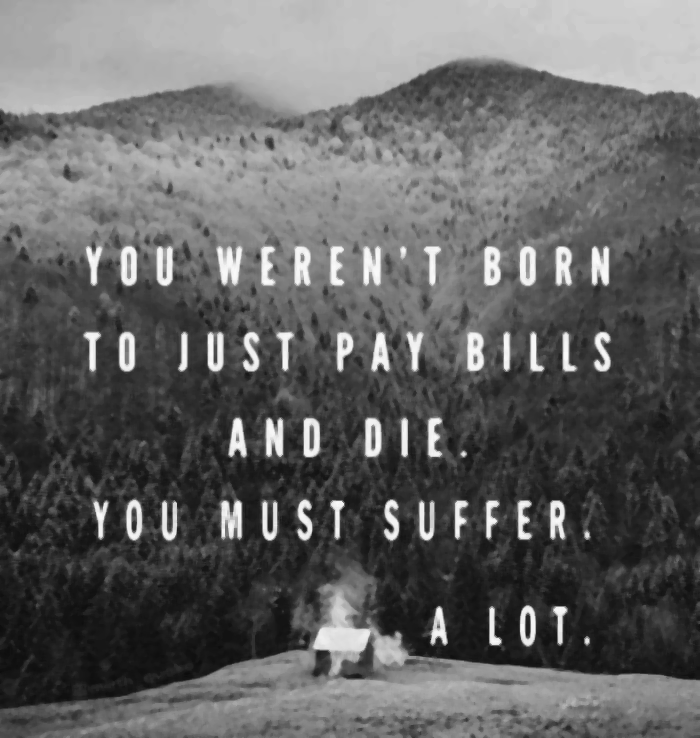

In [51]:
def remove_noise (image) : 
    return cv2.medianBlur(image,5)

noise = remove_noise(gray)
Image.fromarray(noise)

In [52]:
text = pytesseract.image_to_string(noise)
print(text)

AND DIE.
YOU MUST SUFFER.




### Binarisation de l'image : le seuillage

Nous allons maintenant appliquer un seuillage d'image. Le seuillage est un type de segmentation d'image, qui consiste à modifier les pixels d'une image pour faciliter son analyse. Dans le seuillage, nous convertissons une image en couleur ou en niveaux de gris en une image binaire, c'est-à-dire une image qui est simplement en noir et blanc afin de faciliter la détéection du texte :

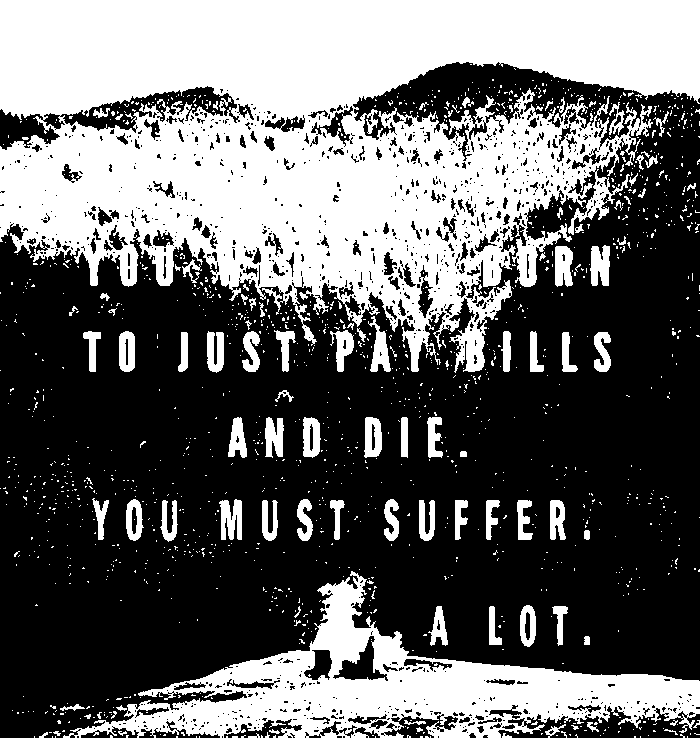

In [53]:
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
thresh = thresholding(gray)
Image.fromarray(thresh)

In [54]:
text = pytesseract.image_to_string(thresh)
print(text)

En général, ces étapes suffisent à extraire du texte d'une image avec un degré suffisamment élevé de précision. Néanmoins, il existe d'autres méthodes listées plus bas (liste non exhaustive) qui permettent d'accroître encore la précision lorsque l'on cherche à extraire du texte d'images plus complexes (panneaux publicitaires, plaques d'immatriculation, etc ...)

### Les opérations morphologiques 

Opérons maintenant des opérations morphologiques. Elles sont utilisées pour extraire les composantes de l'image qui sont utiles à la représentation et à la description de la forme de la région. Les opérations morphologiques sont des tâches de base qui dépendent de la forme de l'image. Elles sont généralement effectuées sur des images binaires. Elles nécessitent deux sources de données, l'une est l'image d'entrée, la seconde est appelée composante structurante. Les opérateurs morphologiques prennent une image d'entrée et un composant structurant en entrée et ces éléments sont ensuite combinés à l'aide des opérateurs d'ensemble. Les objets de l'image d'entrée sont traités en fonction des attributs de la forme de l'image, qui sont codés dans la composante structurante.

#### Erosion de l'image

Tout d'abord l'érosion : l'érosion supprime des pixels aux limites des objets. Le nombre de pixels ajoutés ou retirés des objets d'une image dépend de la taille et de la forme de l'élément structurant utilisé pour traiter l'image. 

Concernant l'érosion, la valeur du pixel de sortie est la valeur minimale de tous les pixels du voisinage. Dans une image binaire, un pixel est mis à 0 si l'un des pixels voisins a la valeur 0.

L'érosion morphologique supprime les pixels flottants et les lignes fines de sorte qu'il ne reste que des objets substantiels. Les lignes restantes apparaissent plus fines et les formes plus petites.

Concrètement en termes de code :
- Un noyau (une matrice de taille impaire (3,5,7)) est convolué avec l'image.
- Puis un pixel de l'image originale (soit 1 ou 0) sera considéré comme 1 seulement si tous les pixels sous le noyau sont 1, sinon, il est érodé (rendu à zéro).
- Ainsi, tous les pixels proches de la frontière seront éliminés en fonction de la taille du noyau.
- Et, l'épaisseur ou la taille de l'objet de premier plan diminue ou simplement la région blanche diminue dans l'image.

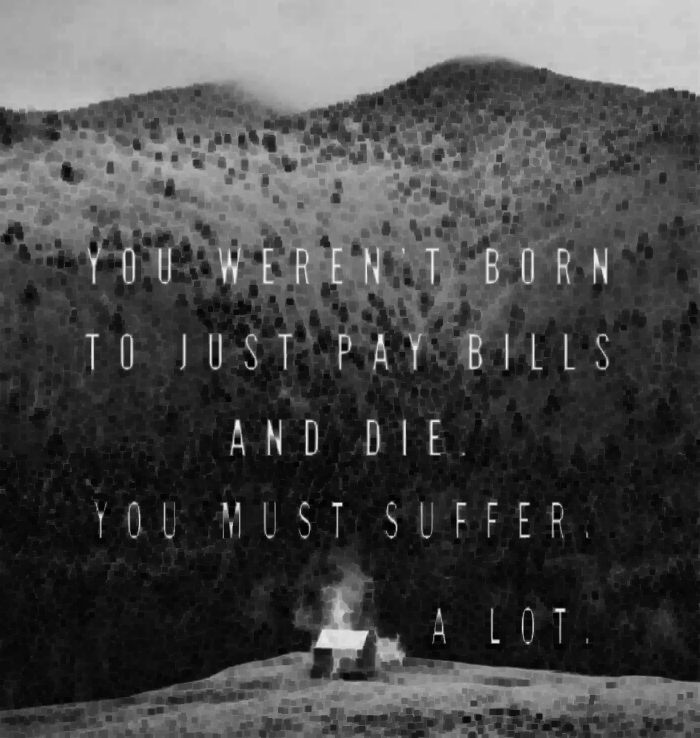

In [55]:
def erode(image):
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

erode = erode(gray)
Image.fromarray(erode)

In [56]:
text = pytesseract.image_to_string(erode)
print(text)

TO JUSTPAY
AND DIE.
YOU HUST SUEFER.




#### Ouverture de l'image

L'ouverture est similaire à l'érosion car elle tend à éliminer les pixels d'avant-plan brillants des bords des régions de pixels d'avant-plan. L'opérateur a pour effet de sauvegarder la région de premier plan qui présente une similitude avec l'élément structurant, ou qui peut contenir totalement l'élément structurant tout en éliminant toutes les autres zones de pixels de premier plan. L'opération d'ouverture est utilisée pour supprimer le bruit interne d'une image :

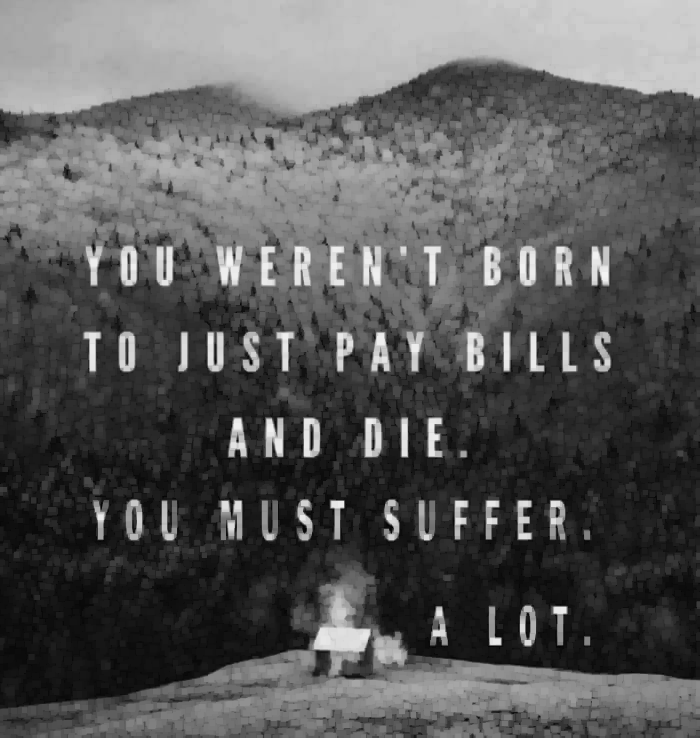

In [57]:
def opening(image):
    kernel = np.ones((5,5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

opening = opening(gray)
Image.fromarray(opening)

In [58]:
text = pytesseract.image_to_string(opening)
print(text)

10 lust’ PA *AYLLS
AND DIE.
YOU MUST SUFFER.




### Détection des bords

Essayons maintenant de détecter les bordures dans l'image. La détection des bords est une technique qui permet d'extraire des informations structurelles utiles de différents objets et de réduire considérablement la quantité de données à traiter :

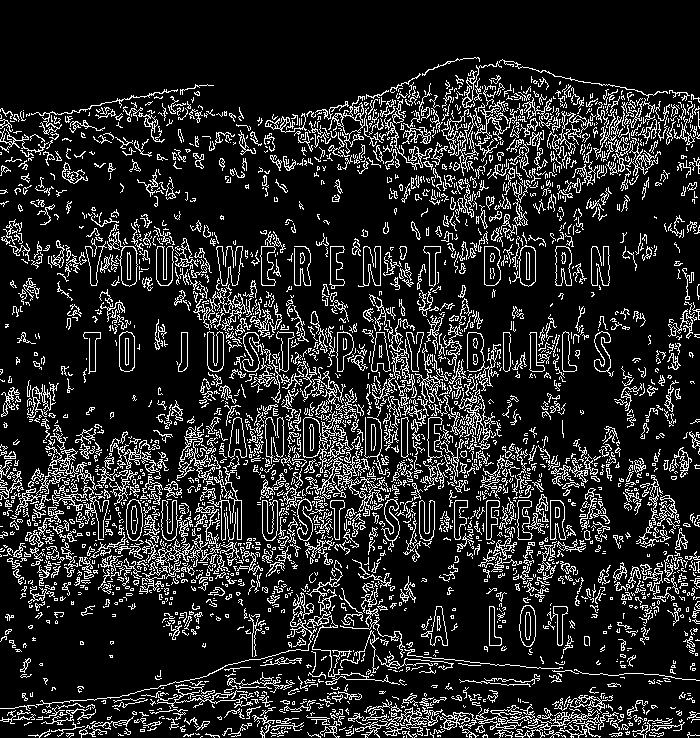

In [59]:
def canny(image):
    return cv2.Canny(image, 100, 200)

canny = canny(gray)
Image.fromarray(canny)

In [61]:
text = pytesseract.image_to_string(canny)
print(text)

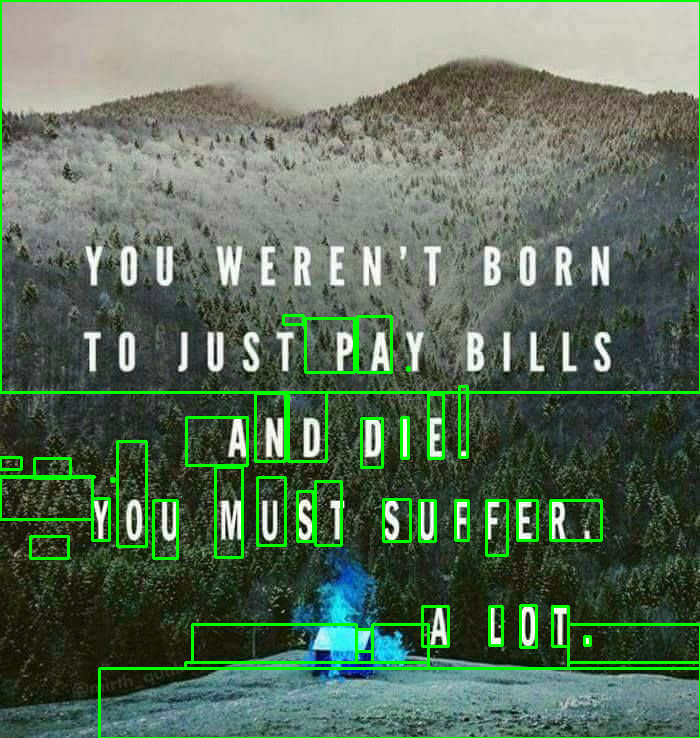

In [60]:
img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

Image.fromarray(img)

In [62]:
text = pytesseract.image_to_string(img)
print(text)

WND DIE.
You MUST Si RFIER:

Sere A UOT.


